# Arbre de décision et Forêts aléatoires

Nous allons ici nous intéresser à deux méthodes d'**apprentissage supervisé** pour résoudre des problèmes de **classification**: les arbres de décision (**Decision Tree**) et les forêts aléatoires (**Random Forests**) 

Les Random Forests est une méthode ensembliste qui repose sur l'aggrégation (**Bagging**) de plusieurs arbres de type **CART** (**C**lassification **A**nd **R**egression **T**rees). Il existe d'autres types d'arbres (ex: CHAID, C4.5,etc) mais ceux-ci ne seront pas traités ici. 

Le principe général de **CART** est de partitionner récursivement l’espace des données de façon **binaire**, en sous-groupes **homogènes*** en termes de classe (**label**). 

<div>
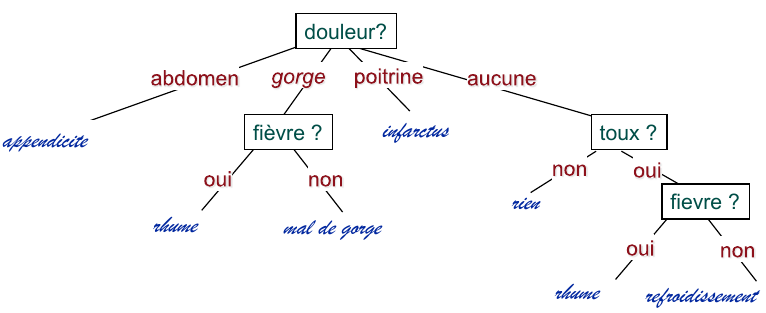
</div>

#### **Arbre de décision du jeu de données TITANIC**

<div>
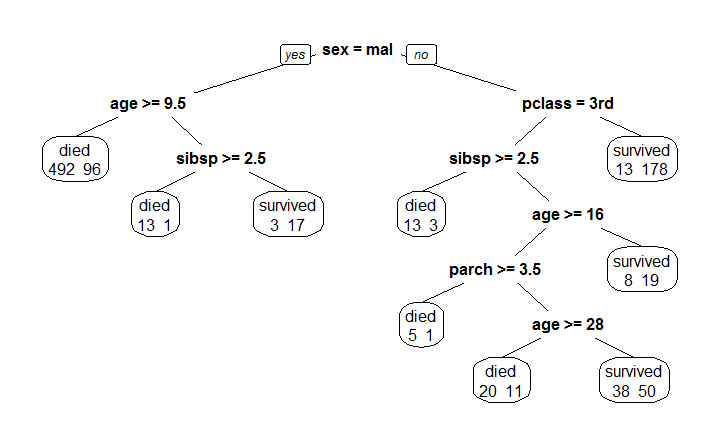
</div>

#### **Algorithme de l'arbre CART**

<div>
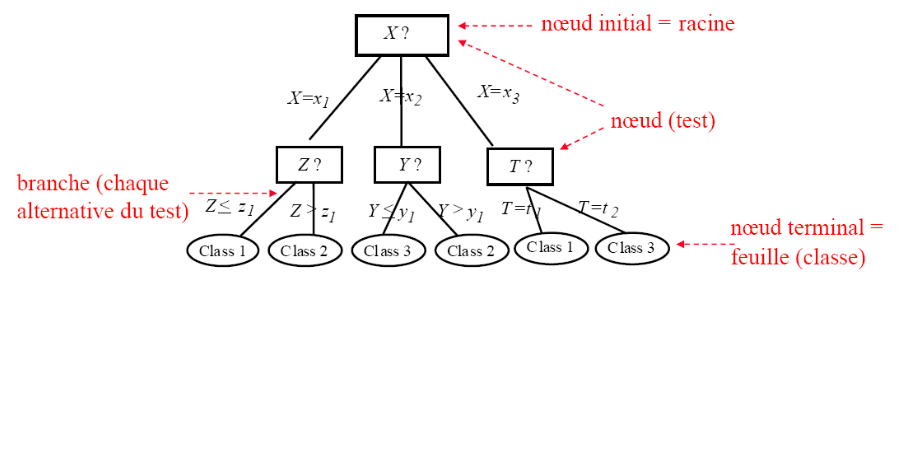
</div>

L'arbre CART est construit de manière **récursive**. Partant de la racine (regroupement des observations de la base de **Training**)de l'arbre, on effectue une suite de tests pour définir les noeuds de l'arbre puis les feuilles (noeuds terminaux). 
- A chaque noeud, l'idée est de séparer au mieux (au sens de la Target 0 vs 1) les individus de la base X en choisissant le meilleur couple (variable, seuil de découpage). 
- On split (découpe) alors $X$ en deux parties : $X_G$ (individus à gauche) et $X_D$ (individus à droite). On construit alors les sous-arbres partant de $X_G$ et de $X_D$. 
L'idée est d'avoir des noeuds les **plus purs** possible. Pour les arbres CART, le critère utilisé à chaque étape est le **critère d'impureté du Gini**. On construit alors les sous-arbres en cherchant à **maximiser le décroissance du critère d'impureté** (les noeuds seront ainsi de plus en plus purs - tels que le maximum d'individus qui les composent appartiennent à la même classe).

La classe prédite pour une feuille (noeud terminal) est obtenue en effectuant un **vote majoritaire** parmi les exemples de la base Training appartenant à cette feuille.

Afin d'éviter le sur-apprentissage (**over-fitting**), on effectue généralement un **élagage** de l'arbre construit (suppression des branches peu représentatives et nuisant à la généralisation). Les arbres retenus peuvent varier selon la stratégie d'élagage adopté (profondeur de l'arbre, nombre d'observations minimal par feuille,etc...).


#### **Random Forests**

Une Random Forest est un ensemble d'arbres CART. Elle repose sur le principe que *l'union fait la force*. L'idée est de générer **un grand nombre d'arbres CART simples sans élagage** puis de les aggréger. Un vote majoritaire sur l'ensemble des arbres est ensuite effectué pour prédire la classe d'appartenance de chaque individu. 

On souhaite avoir des arbres très différents les uns les autres (très décorrélés). Pour ce faire, on va construire chaque arbre sur un échantillon d'individus différent(obtenu par Bootstrap - tirage avec remise dans la base de Training). Pour chaque noeud de l'arbre choisi,on choisit le "split" (variable, seuil de découpage) optimal parmi k variables tirées aléatoirement dans les p variables du dataset (k<<p). 

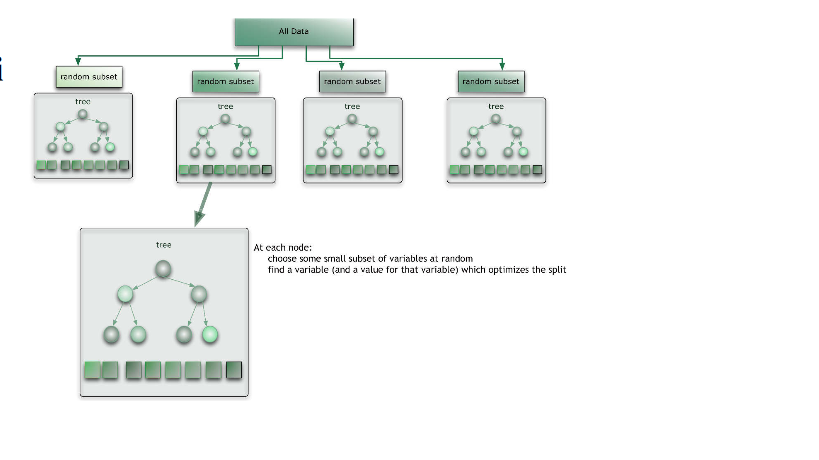

Dans ce notebook, nous allons appliquer les modèles CART et RANDOM FORESTS au jeu de données **PIMA INDIAN DIABETES**. 
On cherche à prédire si un patient est diabétique ou non.

Les données disponibles sont les suivantes :

Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure  = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction = Diabetes pedigree function

Age  = Age (years)

Outcome = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)



http://perso.mines-paristech.fr/fabien.moutarde/ES_MachineLearning/Slides/coursFM_AD-RF.pdf


### 1. Import des libraries utiles

In [3]:
#Analyse exploratoire des données et Preprocessing
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

### 2. Description du dataset
1. Charger le dataset et afficher sa dimension

2. Afficher les 10 premières lignes de la table

3. Afficher la liste des variables et leurs types


In [4]:
path = "C:/Users/maison/Downloads/"

df = pd.read_csv(path+"diabetes.csv")

df.shape
df.head(10)

#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
#pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [18]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 ### 3. Analyse des valeurs manquantes
1. Afficher le nombre ainsi que le pourcentage de valeurs manquantes par variable


In [13]:
# check missing values in train dataset
df.isnull().sum()
round(df.isnull().sum()/df.shape[0]*100,2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

 ### 4. Analyse exploratoire 
 
 1. Afficher le `distplot`de la variable `Glucose`. Commenter
 2. Afficher le `distplot` de la variable `DiabetesPedigreeFunction`. Commenter
 3. Afficher le `Boxplot`de la variable `Insulin`en fonction de la variable cible `Outcome`
 4. Afficher les `Boxplot` des variables `BMI` et `Age` en fonction de la variable cible `Outcome`
 5. Afficher le `pairplot`de l'ensemble des variables `BloodPressure`et `BMI`en fonction de la variable `Outcome`.Commenter
 6. Afficher la HeatMap des corrélations de l'ensemble des variables (hors variable cible). Commenter
 
 **Bonus:** Afficher le `kdeplot`de l'ensemble des variables en fonction de la variable cible. Commenter
 
 

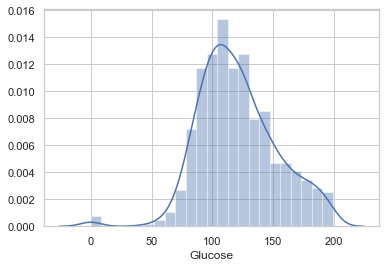

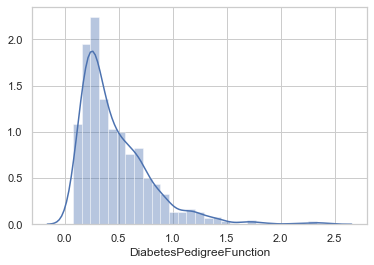

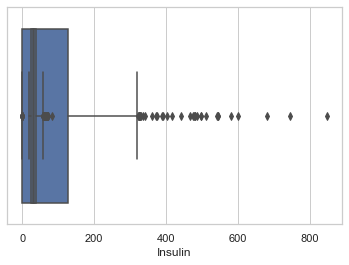

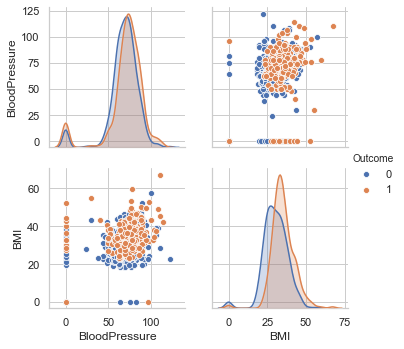

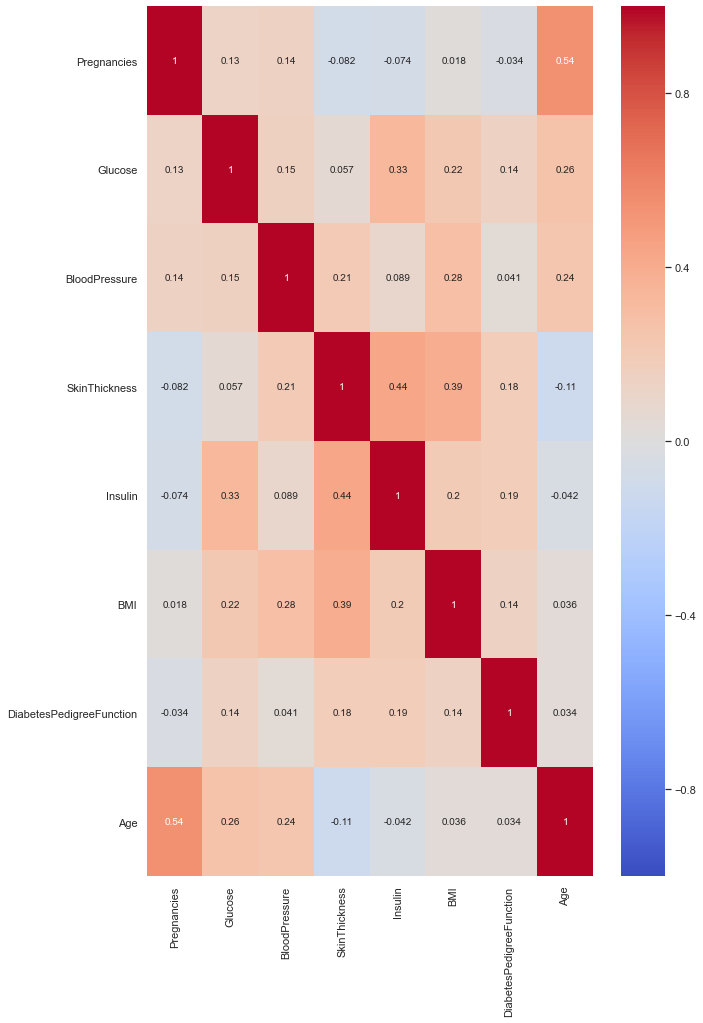

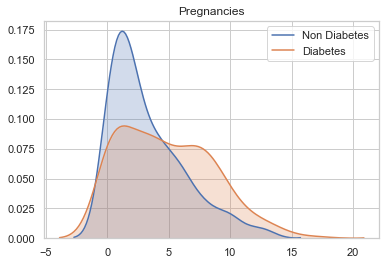

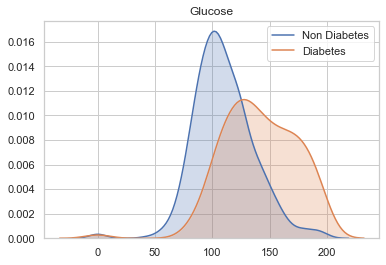

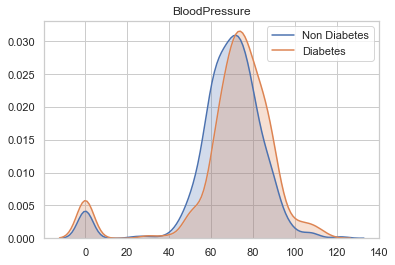

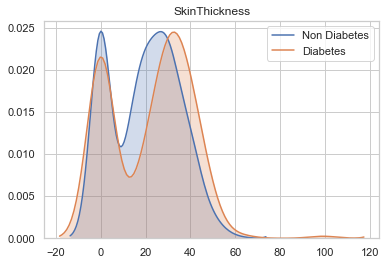

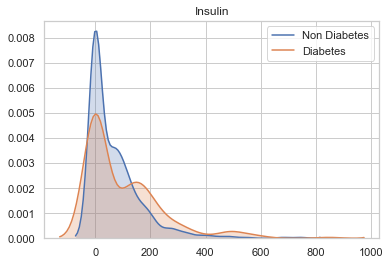

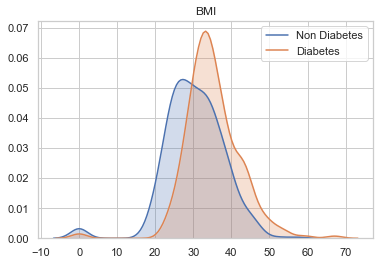

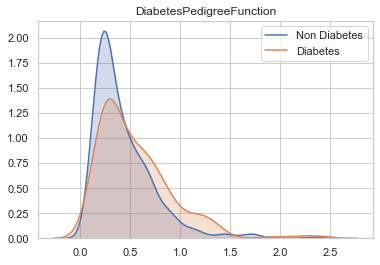

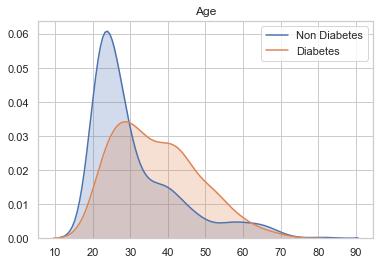

In [60]:
%matplotlib inline

sns.distplot(df["Glucose"],kde = True)
plt.show()
sns.distplot(df["DiabetesPedigreeFunction"])
plt.show()

sns.boxplot(x = "Insulin",hue = "Outcome",data = df)
sns.boxplot(x = ["BMI","Age"],hue = "Outcome",data = df)
plt.show()

sns.pairplot(df,vars = ["BloodPressure","BMI"], hue="Outcome")
plt.show()

plt.figure(figsize=(10,16))
sns.heatmap(df.iloc[:,:-1].corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

plt.show()

for col in df.iloc[:,:-1].columns:
    sns.kdeplot(df.loc[df['Outcome']== 0,col], shade=True,label = "Non Diabetes")
    sns.kdeplot(df.loc[df['Outcome']== 1,col], shade=True,label = "Diabetes")
    plt.title(col)
    plt.show()



 ### 5. Data splitting
 
 1. Créer un DataFrame `X` contenant les features et `y` la Target
 2. Générer les échantillons d'apprentissage (training) et de test à l'aide de `sklearn.model_selection.train_test_split` en fixant le test_size à 0.33 et random_state à 42 et stratify = y 

3. Àfficher le tableau de fréquence de la variable `y` (en nombre et pourcentage) pour les 2 échantillons générés. Commenter 

In [5]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state = 42,stratify = y)
print(y_train.value_counts()/y_train.count())
print(y_test.value_counts()/y_test.count())


0    0.651751
1    0.348249
Name: Outcome, dtype: float64
0    0.649606
1    0.350394
Name: Outcome, dtype: float64


 ### 6. TREE - Modélisation et Performances

Nous allons à cette stade entraîner un **modèle TREE** en utilisant la fonction `sklearn.tree.DecisionTreeClassifier`

1. Afficher la DocString de cette fonction
2. On choisit max_depth = 3 ou min_samples_leaf = 10. Quelle est leur signification?
3. Instancier un `DecisionTreeClassifier(max_depth=3)` et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage

In [6]:
from sklearn.tree import DecisionTreeClassifier

print(DecisionTreeClassifier.__doc__)

A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : string, optional (default="gini")
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.

    splitter : string, optional (default="best")
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.

    max_depth : int or None, optional (default=None)
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int, float, optional (default=2)
        The minimum number of samples required to split an internal node:

        - If int, then consider `min_samples_split` as the minimum number.
        - If floa

In [7]:
clf = DecisionTreeClassifier(max_depth = 3)

clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

4. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test. 

5. Définir une matrice de confusion
   Afficher la `heatmap` de la matrice de confusion (fonction `sklearn.metrics.confusion_matrix`). Commenter

6. Afficher l'AUC
   
7. Définir la courbe ROC
   Afficher la courbe ROC. Interpréter
   
8. Visualiser l'arbre construit à l'aide de `sklearn.tree.plot_tree`. Commenter les résultats. 
 
 **Bonus** : Visualiser l'arbre à l'aide de `sklearn.tree.export_graphviz` (pip install graphviz)


[[144  21]
 [ 47  42]]
Accuracy: 0.7322834645669292
Precision: 0.6666666666666666
Recall: 0.47191011235955055


numpy.ndarray

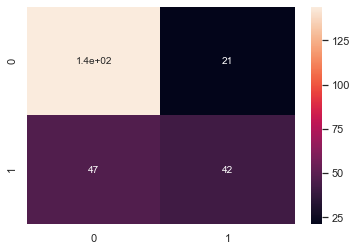

In [12]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

#0.7322834645669292

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
sns.heatmap(cnf_matrix,annot=True)


y_pred_proba = clf.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred)


print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))


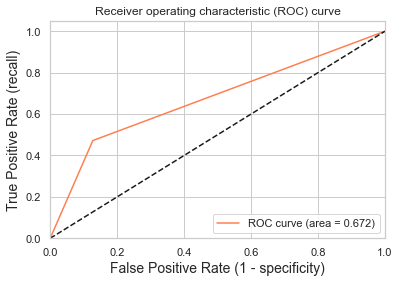

In [9]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


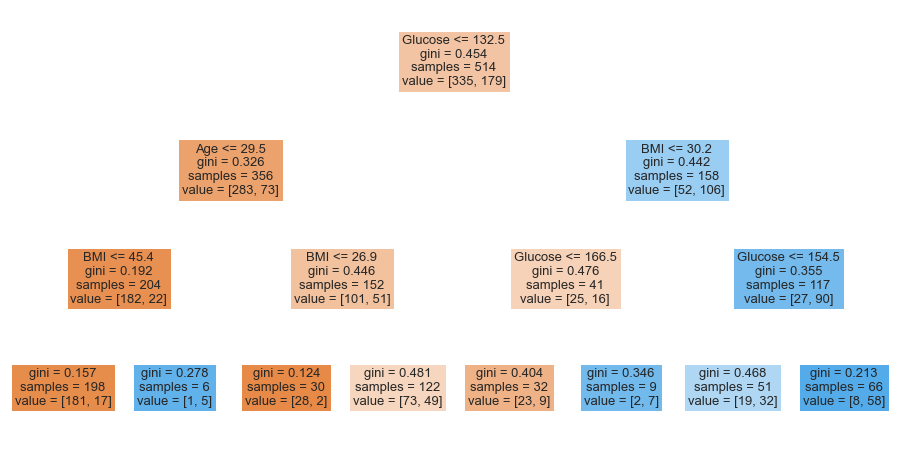

In [17]:
#pip install pydotplus
#pip install graphviz
#conda install python-graphviz

from sklearn.tree import plot_tree, export_graphviz

fig = plt.figure(figsize=(16,8))
fig = plot_tree(clf, filled=True,feature_names =df.columns)




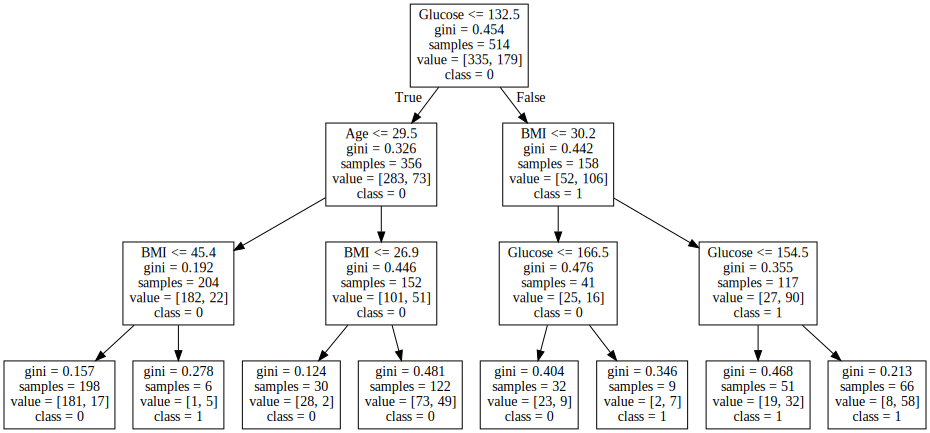

In [23]:
#pip install graphviz
#conda install python-graphviz

from sklearn import tree
import graphviz 
from IPython.display import display

display(graphviz.Source(export_graphviz(clf,feature_names = X_train.columns,class_names=['0','1'])))
        

In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())




C:\Users\maison\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


InvocationException: GraphViz's executables not found

Pros

    Decision trees are easy to interpret and visualize.
    It can easily capture Non-linear patterns.
    It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
    It can be used for feature engineering such as predicting missing values, suitable for variable selection.
    The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

Cons

    Sensitive to noisy data. It can overfit noisy data.
    The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
    Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.


 ### 7. Random Forest - Modélisation et Performances

Nous allons à cette stade entraîner un **modèle RANDOM FOREST ** en utilisant la fonction `sklearn.ensemble.RandomForestClassifier`

1. Afficher la DocString de cette fonction
2. On choisit n_estimators=1000. Quelle est sa signification?
3. Instancier un `RandomForestClassifier(n_estimators=1000)` et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

rf.score(X_train, y_train)

1.0

4. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test. 

5. Afficher l'AUC

6. Afficher l'importance de chaque variable dans le RF avec `rf.feature_importances_`. Associer à chaque niveau le nom de la variable associée (dans l'ordre des variables disponibles dans le dataset).
   Afficher le `barplot` de l'importance par variable. Commenter
   
**Bonus** : Exclure les 2 variables les moins importantes (`SkinThickness`et `Insulin`) et relancer le modèle. Comparer l'AUC à celui du modèle incluant l'ensemble des variables
**Bonus**: Rechercher les hyperparamètres optimaux de la RF par GridSearch puis relancer le modèle RF et calculer l'AUC. Commenter les résultats par comparaison avec les précédents modèles

```
param_grid = { 
    'n_estimators': [100, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
```

In [18]:
y_pred = rf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(rf.feature_importances_)

Accuracy: 0.7677165354330708
[0.092987   0.25791384 0.08963467 0.07112128 0.07437631 0.16213303
 0.12272489 0.12910899]


In [16]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Glucose                     0.257914
BMI                         0.162133
Age                         0.129109
DiabetesPedigreeFunction    0.122725
Pregnancies                 0.092987
BloodPressure               0.089635
Insulin                     0.074376
SkinThickness               0.071121
dtype: float64

No handles with labels found to put in legend.


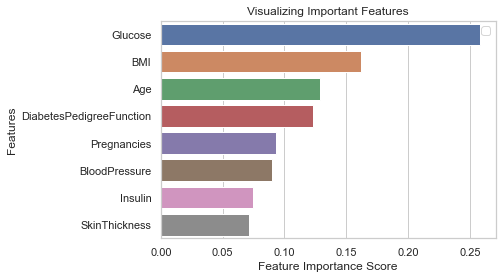

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [22]:
X_train2 = X_train.drop(['SkinThickness','Insulin'],axis = 1)
X_test2 = X_test.drop(['SkinThickness','Insulin'],axis = 1)

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train2, y_train)

y_pred = rf.predict(X_test2)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Accuracy: 0.7637795275590551

Accuracy: 0.7637795275590551


In [23]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

print(CV_rfc.best_params_)

#{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 500}

{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 500}


In [24]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=3)

rfc1.fit(X_train, y_train)

pred=rfc1.predict(X_test)

print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

#0.7480314960629921



Accuracy for Random Forest on CV data:  0.7480314960629921


Advantages:

    Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
    It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.
    The algorithm can be used in both classification and regression problems.
    Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.
    You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

Disadvantages:

    Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.
    The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.

Finding important features

Random forests also offers a good feature selection indicator. Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.

This score will help you choose the most important features and drop the least important ones for model building.

Random forest uses gini importance or mean decrease in impurity (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the overall explanatory power of the variables.

Random Forests vs Decision Trees

    Random forests is a set of multiple decision trees.
    Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
    Decision trees are computationally faster.
    Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.
